# **Network Intrusion Detection using SVM**

The objective of this project is to build a **Support Vector Machine (SVM)** model to detect and classify network intrusions based on various network traffic features such as **protocol type, service, flag, and traffic characteristic**s (e.g., duration, source bytes, destination bytes). The dataset requires preprocessing steps, including handling categorical variables, removing duplicates, and feature scaling.The trained SVM model's performance will be evaluated using metrics such as** accuracy, precision, recall, F1-score**, and **confusion matrix analysis**. Additionally, hyperparameter tuning will be conducted using **GridSearchCV** to optimize the model's performance for accurate intrusion detection.

## **Step 1 : Import Libraries**

* **pandas**: Used for data manipulation and analysis, providing data structures like DataFrames.
* **numpy**: Used for numerical operations, handling arrays and matrices.
* **seaborn**: A data visualization library based on matplotlib for creating informative and attractive statistical graphics.
* **matplotlib.pyplot**: Used for creating static, interactive, and animated visualizations in Python.
* **sklearn.model_selection**:
  * **train_test_split**: Splits data into training and testing sets.
  * **GridSearchCV**: Performs an exhaustive search over hyperparameter values for an estimator.
* **sklearn.preprocessing**:
  * **StandardScaler**: Scales features by removing the mean and scaling to unit variance.
  * **LabelEncoder**: Encodes categorical labels as numeric values.
* **sklearn.svm**:
  * **SVC**: Implements Support Vector Classification (SVC) for classifying network intrusions.
* **sklearn.metrics**:
  * **classification_report**: Provides precision, recall, and F1-score for model evaluation.
  * **confusion_matrix**: Displays the confusion matrix to visualize classification results.


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

## **Step 2 : Load and Inspect Data**

The dataset used for this **Network Intrusion Detection System (IDS)** project contains network traffic features, including attributes such as **protocol type, service, and flag** along with features like **duration, source bytes (src_bytes), and destination bytes (dst_bytes)**.




In [5]:
df = pd.read_csv(r'/Users/yusufkhan/Desktop/Network_data.csv')

In [6]:
print("Dataset Shape:", df.shape)
print("\nSample Data:\n", df.head())

Dataset Shape: (25192, 42)

Sample Data:
    duration protocol_type   service flag  src_bytes  dst_bytes  land  \
0         0           tcp  ftp_data   SF        491          0     0   
1         0           udp     other   SF        146          0     0   
2         0           tcp   private   S0          0          0     0   
3         0           tcp      http   SF        232       8153     0   
4         0           tcp      http   SF        199        420     0   

   wrong_fragment  urgent  hot  ...  dst_host_srv_count  \
0               0       0    0  ...                  25   
1               0       0    0  ...                   1   
2               0       0    0  ...                  26   
3               0       0    0  ...                 255   
4               0       0    0  ...                 255   

   dst_host_same_srv_rate  dst_host_diff_srv_rate  \
0                    0.17                    0.03   
1                    0.00                    0.60   
2          

**Top Services Targeted by Attacks**

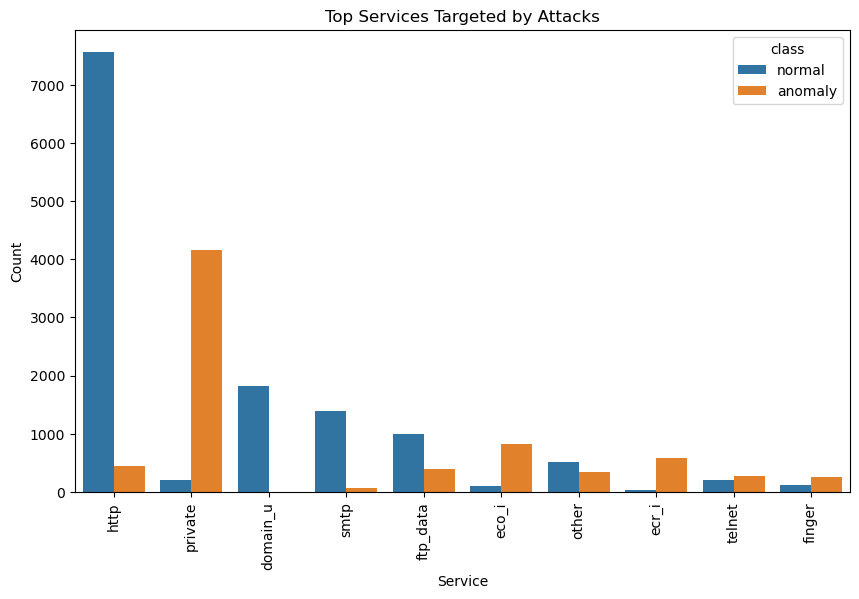

In [8]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='service', hue='class',
              order=df['service'].value_counts().index[:10])
plt.xticks(rotation=90)
plt.title('Top Services Targeted by Attacks')
plt.xlabel('Service')
plt.ylabel('Count')
plt.show()


**Protocol Type vs Class**

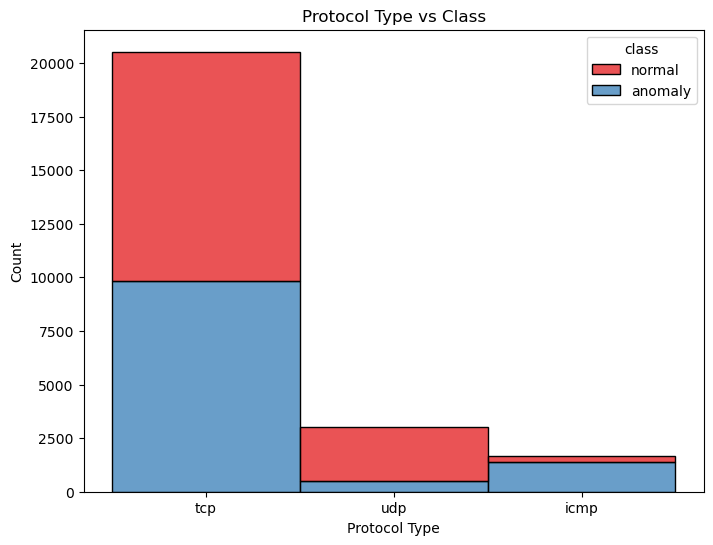

In [10]:
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='protocol_type', hue='class', multiple='stack', palette='Set1')
plt.title('Protocol Type vs Class')
plt.xlabel('Protocol Type')
plt.ylabel('Count')
plt.show()

**Distribution of Classes in the Dataset**

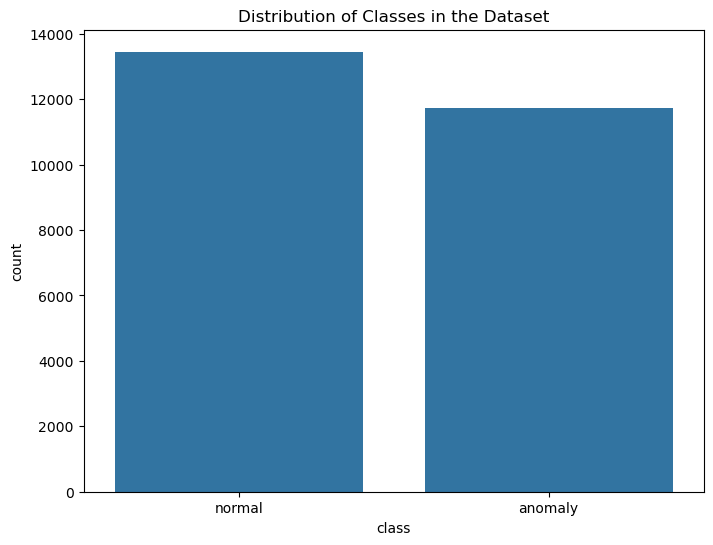

In [12]:
plt.figure(figsize=(8, 6))
sns.countplot(x='class', data=df)
plt.title("Distribution of Classes in the Dataset")
plt.show()

## **Step 3 : Data Preprocessing**



**3.1 : Drop unnecessary columns**


In this step, we handle missing values in the dataset to ensure data quality and consistency. Common techniques include:
- Dropping missing values.
- Filling missing values with mean, median, or mode.
- Dropping duplicate values.

In [15]:
df.drop_duplicates(inplace=True)
df.dropna(inplace=True)

**3.2 : Encode categorical features**

Looping through categorical_columns, the code applies label encoding to convert text categories like **protocol types** into integer values for compatibility with machine learning algorithms.


In [17]:
label_encoder = LabelEncoder()
categorical_columns = ['protocol_type', 'service', 'flag']

for col in categorical_columns:
    df[col] = df[col].astype(str)
    df[col] = label_encoder.fit_transform(df[col])

**3.3 : Split data into features and target**

X holds the independent features, while y contains the dependent variable (class) used for classification.

In [19]:
X = df.drop(columns=['class'])
y = df['class']

 **3.4 : Standardize numerical features**

 **StandardScaler()** scales features by centering and normalizing them to unit variance. This ensures that features with different ranges don’t dominate the learning process of the model.


In [21]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

**3.5 : Split into training and testing sets**

* **train_test_split()** splits data into training (70%) and testing (30%) subsets.
* **random_state=42** ensures reproducibility by generating the same split each time.

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)


## **Step 4: Train the SVM Model**
To train and evaluate an SVM model using various kernels (linear, sigmoid, and RBF) and compare their performance.

Common steps include:
- **Model Training**:
For each kernel type, an SVM model is trained on the scaled features (X_scaled) and labels (y).

- **Prediction**:
The trained model makes predictions on the same dataset (X_scaled).

- **Evaluation Metrics**:

 - **Accuracy**: The proportion of correctly classified instances.
 - **Confusion Matrix**: Breakdown of true and false predictions.
 - **Classification Report**: Provides precision, recall, and F1-score for each class.

In [25]:
def train_and_evaluate_svm(kernel_type):
    print(f"\nTraining SVM with {kernel_type} kernel...")
    model = SVC(kernel=kernel_type) #SVC(kernel='linear')
    model.fit(X_scaled, y)

    y_pred = model.predict(X_scaled)
    accuracy = model.score(X_scaled, y)

    print(f"Accuracy for {kernel_type} kernel: {accuracy:.2f}")
    print(f"Confusion Matrix for {kernel_type} kernel:\n", confusion_matrix(y, y_pred))
    print(f"Classification Report for {kernel_type} kernel:\n", classification_report(y, y_pred))

for kernel in ['linear', 'sigmoid', 'poly', 'rbf']:
    train_and_evaluate_svm(kernel)


Training SVM with linear kernel...
Accuracy for linear kernel: 0.96
Confusion Matrix for linear kernel:
 [[11003   740]
 [  351 13098]]
Classification Report for linear kernel:
               precision    recall  f1-score   support

     anomaly       0.97      0.94      0.95     11743
      normal       0.95      0.97      0.96     13449

    accuracy                           0.96     25192
   macro avg       0.96      0.96      0.96     25192
weighted avg       0.96      0.96      0.96     25192


Training SVM with sigmoid kernel...
Accuracy for sigmoid kernel: 0.86
Confusion Matrix for sigmoid kernel:
 [[10023  1720]
 [ 1753 11696]]
Classification Report for sigmoid kernel:
               precision    recall  f1-score   support

     anomaly       0.85      0.85      0.85     11743
      normal       0.87      0.87      0.87     13449

    accuracy                           0.86     25192
   macro avg       0.86      0.86      0.86     25192
weighted avg       0.86      0.86      

**Plot confusion matrix for linear, sigmoid and rbf kernel type**

Training and Visualizing Confusion Matrix for linear kernel...


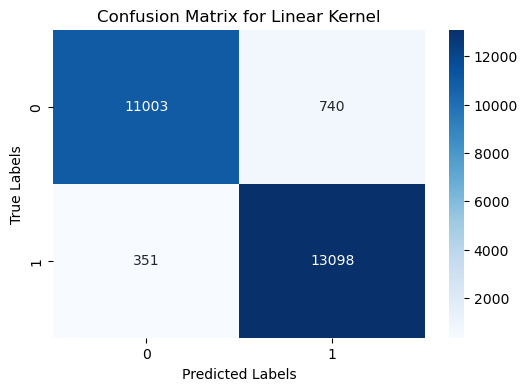

Training and Visualizing Confusion Matrix for sigmoid kernel...


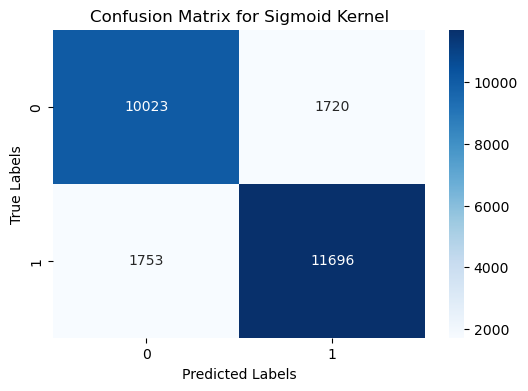

Training and Visualizing Confusion Matrix for poly kernel...


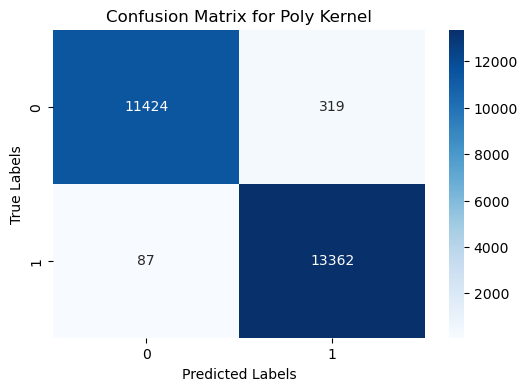

Training and Visualizing Confusion Matrix for rbf kernel...


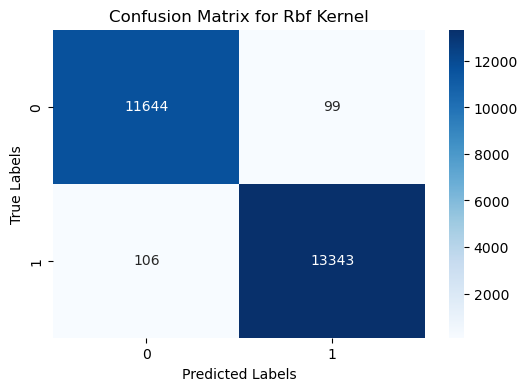

In [27]:
def plot_confusion_matrix_for_svm(kernel_type):
    print(f"Training and Visualizing Confusion Matrix for {kernel_type} kernel...")
    model = SVC(kernel=kernel_type)
    model.fit(X_scaled, y)

    y_pred = model.predict(X_scaled)
    cm = confusion_matrix(y, y_pred)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"Confusion Matrix for {kernel_type.capitalize()} Kernel")
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.show()

for kernel in ['linear', 'sigmoid', 'poly', 'rbf']:
    plot_confusion_matrix_for_svm(kernel)

## **Step 5: Hyperparameter Tuning**

This code uses GridSearchCV to find the best hyperparameters for an SVM model by testing different values for C, gamma, and the rbf kernel

**1.Parameter Grid Setup:**

- **C:** Controls the trade-off between achieving a low error on training data and minimizing model complexity (regularization).
- **gamma:** Defines how far the influence of a single training example reaches. Smaller values mean broader influence, while larger values are more localized.
- **kernel:** Specifies the SVM kernel type. The code uses the RBF (Radial Basis Function) kernel.

**2.GridSearchCV for Hyperparameter Tuning**

- **GridSearchCV:** Searches through all possible combinations of hyperparameters (C, gamma, and kernel) to find the optimal set.
- **refit=True:** Ensures the model is retrained using the best parameter combination after the search.
- **verbose=0:** Displays detailed logs of the search process.

**3.Displaying Best Parameters and Score:**
- **best_params_**: Shows the combination of parameters yielding the highest accuracy during the search.
- **best_score_**: Provides the best cross-validation score.

**4.Model Evaluation:**
- **best_estimator_**: Refers to the model trained using the best hyperparameters.
- **classification_report**: Displays precision, recall, F1-score, and support metrics for evaluating model performance.



In [29]:
kernel_types = ['linear', 'sigmoid', 'poly', 'rbf']
best_params = {}
best_scores = {}

for kernel_type in kernel_types:
    print(f"\nTuning and evaluating for {kernel_type} kernel...")


    if kernel_type == 'linear':
        param_grid = {
            'C': [0.1, 1, 10],
            'kernel': [kernel_type]
        }
    else:
        param_grid = {
            'C': [0.1, 1, 10],
            'gamma': ['scale', 'auto'],
            'kernel': [kernel_type]
        }

    grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=0)
    grid.fit(X_scaled, y)

    best_params[kernel_type] = grid.best_params_
    best_scores[kernel_type] = grid.best_score_

    print(f"Best Params for {kernel_type}: {grid.best_params_}")
    print(f"Best Score for {kernel_type}: {grid.best_score_}\n")



Tuning and evaluating for linear kernel...
Best Params for linear: {'C': 10, 'kernel': 'linear'}
Best Score for linear: 0.9571687955818377


Tuning and evaluating for sigmoid kernel...
Best Params for sigmoid: {'C': 0.1, 'gamma': 'auto', 'kernel': 'sigmoid'}
Best Score for sigmoid: 0.8795649432638992


Tuning and evaluating for poly kernel...
Best Params for poly: {'C': 10, 'gamma': 'scale', 'kernel': 'poly'}
Best Score for poly: 0.9921403209787005


Tuning and evaluating for rbf kernel...
Best Params for rbf: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
Best Score for rbf: 0.992696097080328



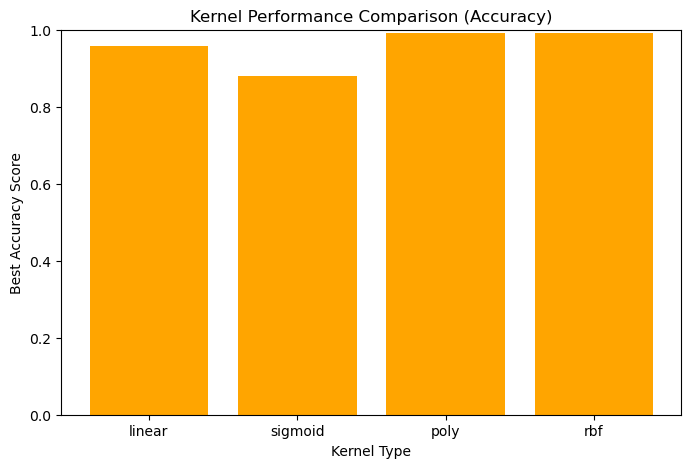

In [30]:
plt.figure(figsize=(8, 5))
plt.bar(best_scores.keys(), best_scores.values(), color='orange')
plt.ylim(0, 1)
plt.title('Kernel Performance Comparison (Accuracy)')
plt.xlabel('Kernel Type')
plt.ylabel('Best Accuracy Score')
plt.show()


In [49]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression(random_state = 42)

classifier.fit(X_train,y_train)

print(classifier.intercept_)
print(classifier.coef_)

[-0.41824504]
[[ 1.31802631e-01  7.11214096e-01 -3.55887802e-02 -1.67652012e+00
  -6.15220304e-01 -1.14417687e-02  6.49411743e-02 -1.44881053e+00
  -8.02586672e-02 -7.85247206e-01 -2.35802638e-03  3.21635269e-01
  -3.08333558e+00  1.61557875e-02  1.24314753e+00  2.41000345e+00
  -6.25552727e-03  2.76512321e-02  1.07669554e-01  0.00000000e+00
   0.00000000e+00  5.93103712e-01 -1.60432603e+00  4.96124846e-01
   9.43788299e-01 -3.08298539e+00 -1.90721131e-01 -1.88582059e+00
   1.20751632e+00  3.27507365e-01 -2.31965388e-01 -8.54795398e-01
   1.53790443e+00 -1.13039120e+00 -2.96192419e-01 -9.08733396e-01
  -3.03879861e-01 -6.06062756e-01 -7.88622912e-01 -3.75757673e-01
   8.64137858e-02]]


In [51]:
Y_pred = classifier.predict(X_test)
print(Y_pred)

['anomaly' 'normal' 'anomaly' ... 'normal' 'anomaly' 'anomaly']


In [53]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
 
cfm = confusion_matrix(y_test,Y_pred)
print(cfm)
print()

print("Classification report: ")
print(classification_report(y_test,Y_pred))
print()
# support is the distribution of observations in the data, number of rows belonging to each class

acc = accuracy_score(y_test, Y_pred)
print("Accuracy of the model: ",acc)

[[3333  183]
 [ 146 3896]]

Classification report: 
              precision    recall  f1-score   support

     anomaly       0.96      0.95      0.95      3516
      normal       0.96      0.96      0.96      4042

    accuracy                           0.96      7558
   macro avg       0.96      0.96      0.96      7558
weighted avg       0.96      0.96      0.96      7558


Accuracy of the model:  0.9564699655993649


In [55]:
from sklearn.naive_bayes import GaussianNB  # For continuous data
# Initialize the model
nb_model = GaussianNB()  # Use MultinomialNB for text data

# Train the model
nb_model.fit(X_train, y_train)

GaussianNB()

In [57]:
# Predict on test data
y_pred = nb_model.predict(X_test)

In [59]:
# Check accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Display classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8991796771632707
Classification Report:
               precision    recall  f1-score   support

     anomaly       0.90      0.88      0.89      3516
      normal       0.90      0.91      0.91      4042

    accuracy                           0.90      7558
   macro avg       0.90      0.90      0.90      7558
weighted avg       0.90      0.90      0.90      7558



In [61]:
cfm = confusion_matrix(y_test,Y_pred)
print(cfm)

[[3333  183]
 [ 146 3896]]
